In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

#cwd = os.getcwd()

data = pd.read_csv('HPI_PO_summary.csv')
data = data[1:]
data = data.rename(columns={"Unnamed: 1": "year", "Unnamed: 2": "quarter", "Unnamed: 3": "HPI_not_seasonal", "Unnamed: 4": "HPI_seasonal"})
data = data[["year", "quarter", "HPI_not_seasonal", "HPI_seasonal"]]
data["year-quarter"] = data['year'].astype(str) +"- "+ data["quarter"].astype(str)

train = data.head(100)
test = data.tail(29)

ARIMA RMSE:  37.14920741708293
SARIMA RMSE:  14.611314054723119


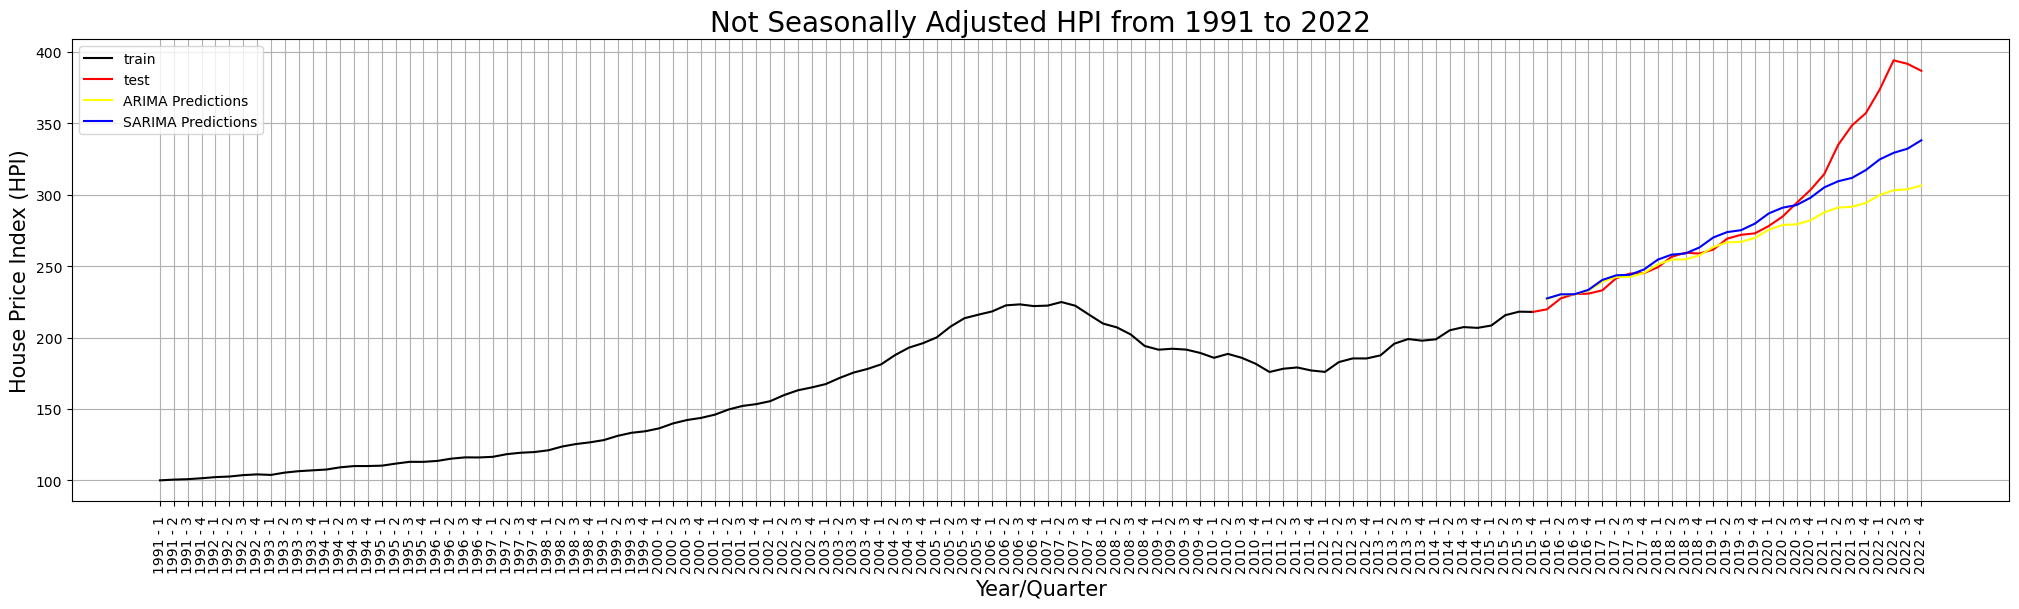

In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['HPI_not_seasonal'].astype(float)

plt.figure(figsize=(25,6))
plt.xticks(rotation=90)
plt.title("Not Seasonally Adjusted HPI from 1991 to 2022", fontsize = 20)
plt.xlabel("Year/Quarter", fontsize = 15)
plt.ylabel("House Price Index (HPI)", fontsize = 15)
plt.plot(train['year-quarter'], train['HPI_not_seasonal'].astype(float), label = "train", color = "black")
plt.plot(test['year-quarter'], test['HPI_not_seasonal'].astype(float), label = "test", color = "red")
plt.grid()

ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(test['year-quarter'], y_pred_out, color='Yellow', label = 'ARIMA Predictions')

import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse = np.sqrt(mean_squared_error(test["HPI_not_seasonal"][1:].values, y_pred_df["Predictions"][1:]))
print("ARIMA RMSE: ",arima_rmse)







SARIMAXmodel = SARIMAX(y, order = (5, 4, 2))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(test['year-quarter'], y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

sarima_rmse = np.sqrt(mean_squared_error(test["HPI_not_seasonal"][1:].values, y_pred_df["Predictions"][1:]))
print("SARIMA RMSE: ",arma_rmse)

plt.show()



ARIMA RMSE:  35.182102827452255
SARIMA RMSE:  14.611314054723119


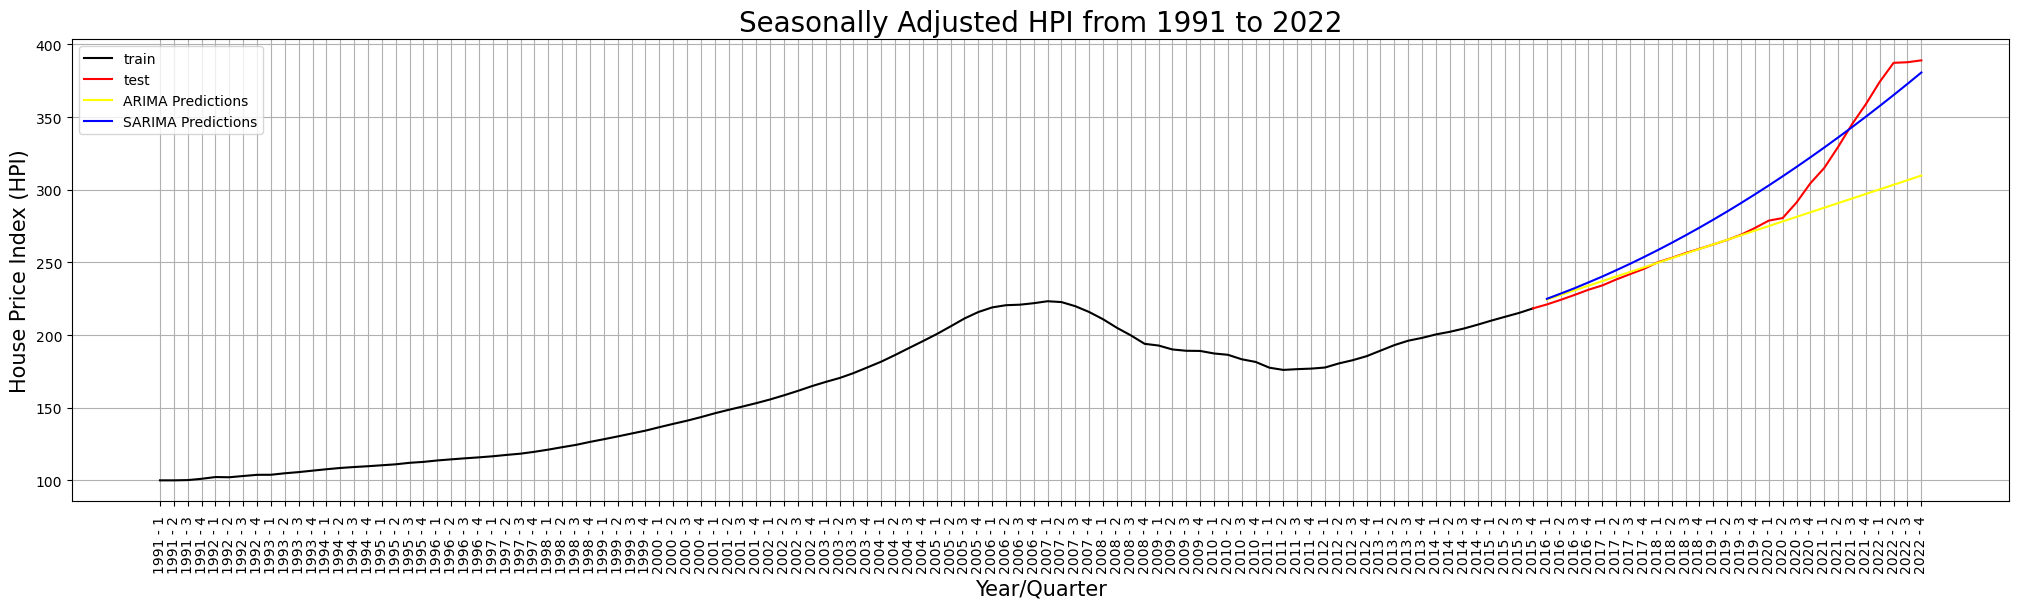

In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['HPI_seasonal'].astype(float)

plt.figure(figsize=(25,6))
plt.xticks(rotation=90)
plt.title("Seasonally Adjusted HPI from 1991 to 2022", fontsize = 20)
plt.xlabel("Year/Quarter", fontsize = 15)
plt.ylabel("House Price Index (HPI)", fontsize = 15)
plt.plot(train['year-quarter'], train['HPI_seasonal'].astype(float), label = "train", color = "black")
plt.plot(test['year-quarter'], test['HPI_seasonal'].astype(float), label = "test", color = "red")
plt.grid()

ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(test['year-quarter'], y_pred_out, color='Yellow', label = 'ARIMA Predictions')

import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse = np.sqrt(mean_squared_error(test["HPI_seasonal"][1:].values, y_pred_df["Predictions"][1:]))
print("ARIMA RMSE: ",arima_rmse)



SARIMAXmodel = SARIMAX(y, order = (5, 4, 2))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(test['year-quarter'], y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

sarima_rmse = np.sqrt(mean_squared_error(test["HPI_seasonal"][1:].values, y_pred_df["Predictions"][1:]))
print("SARIMA RMSE: ",arma_rmse)


plt.show()